In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [2]:
df=pd.read_excel(r'C:\Users\Archita Biswas\Dropbox\My PC (LAPTOP-ILMTPGHN)\Documents\default of credit card clients.xlsx')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.drop(df.columns[[0]],axis=1,inplace=True)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df["X2"]=df["X2"].astype("category")
df["X3"]=df["X3"].astype("category")
df["X4"]=df["X4"].astype("category")
df["Y"]=df["Y"].astype("category")

In [5]:
df.dtypes

X1        int64
X2     category
X3     category
X4     category
X5        int64
X6        int64
X7        int64
X8        int64
X9        int64
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
Y      category
dtype: object

***Checking for NULL Values***

In [6]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [7]:
df.groupby(['Y']).mean()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Y,,,,,,,,,,,,,,,,,,,,
0,178099.726074,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [8]:
df["Y"].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [9]:
X=df.drop(["Y"],axis=1)
Y_resp=df.Y

**Basic EDA**


**Countplot for Sex**

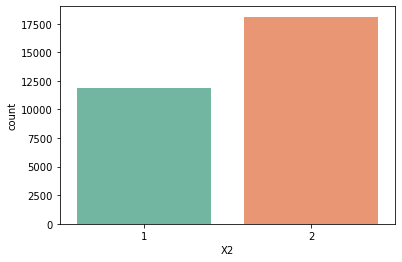

In [10]:
sns.countplot(x='X2',data=X,palette="Set2")
plt.show()

**Countplot for Education**

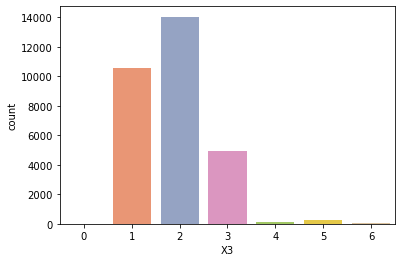

In [11]:
sns.countplot(x='X3',data=X,palette="Set2")
plt.show()

**Countplot for Marriage**

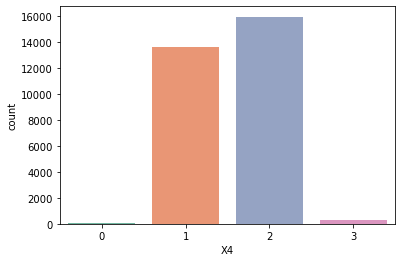

In [12]:
sns.countplot(x='X4',data=X,palette="Set2")
plt.show()

**Countplot for Response**

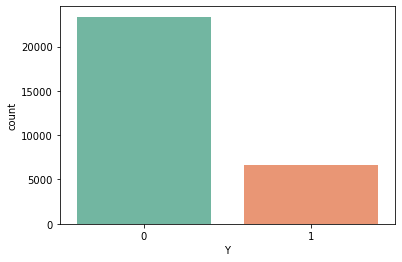

In [13]:
sns.countplot(x="Y",data=df,palette="Set2")
plt.show()

**Boxplot**

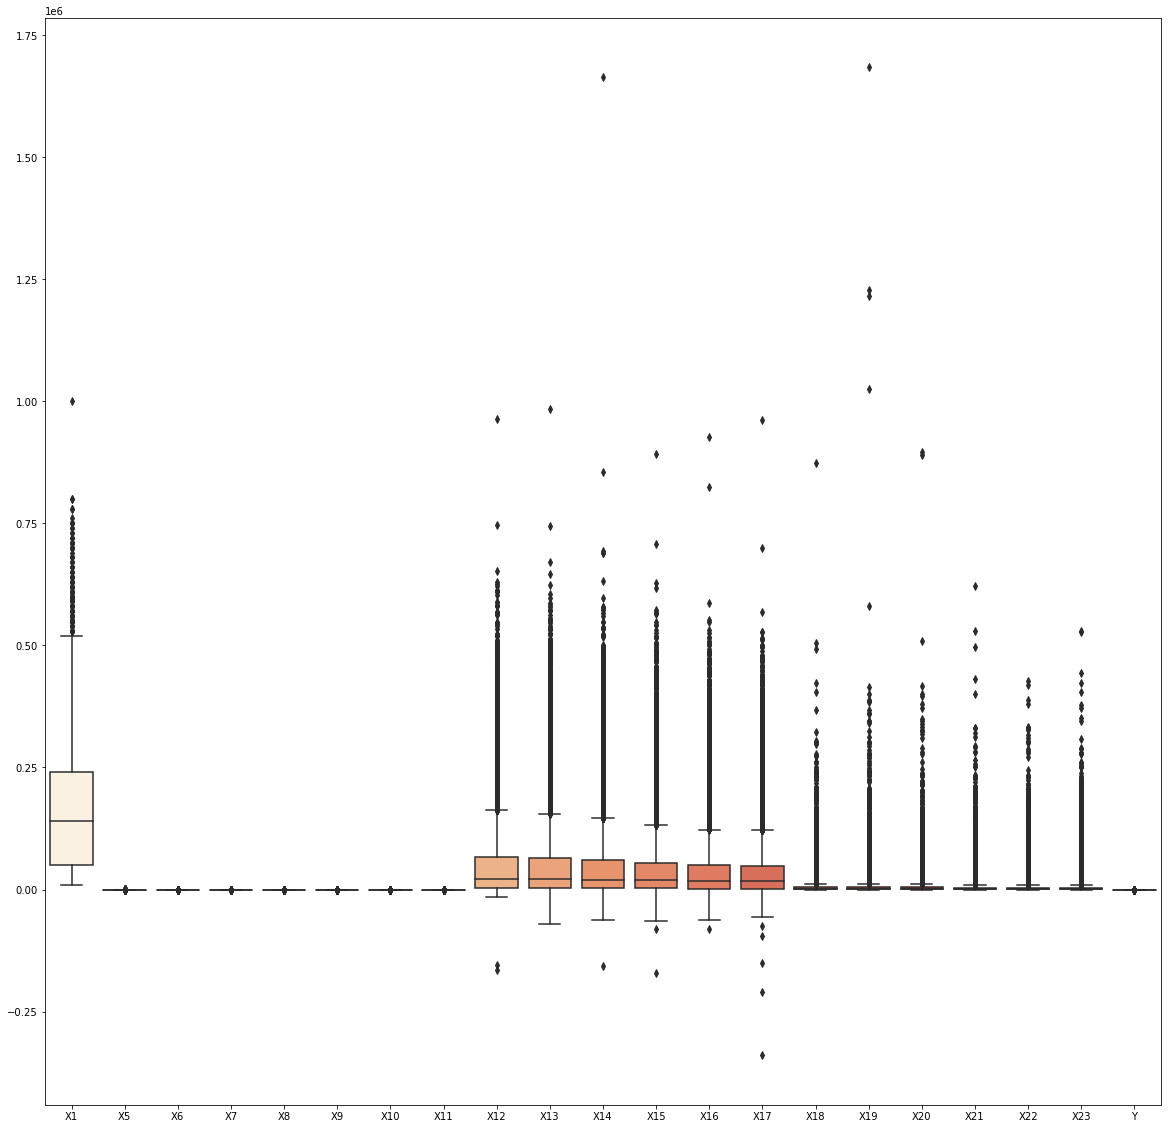

In [14]:
plt.figure(figsize = (20,20))
ax = sns.boxplot(data=df[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","Y"]], 
                 palette="OrRd",orient='v' )

**Histogram for Covariates**

array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>,
        <AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'X9'}>],
       [<AxesSubplot:title={'center':'X10'}>,
        <AxesSubplot:title={'center':'X11'}>,
        <AxesSubplot:title={'center':'X12'}>,
        <AxesSubplot:title={'center':'X13'}>,
        <AxesSubplot:title={'center':'X14'}>,
        <AxesSubplot:title={'center':'X15'}>],
       [<AxesSubplot:title={'center':'X16'}>,
        <AxesSubplot:title={'center':'X17'}>,
        <AxesSubplot:title={'center':'X18'}>,
        <AxesSubplot:title={'center':'X19'}>,
        <AxesSubplot:title={'center':'X20'}>,
        <AxesSubplot:title={'center':'X21'}>],
       [<AxesSubplot:title={'center':'X22'}>,
        <AxesSubplot:title={'center':'X23'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<A

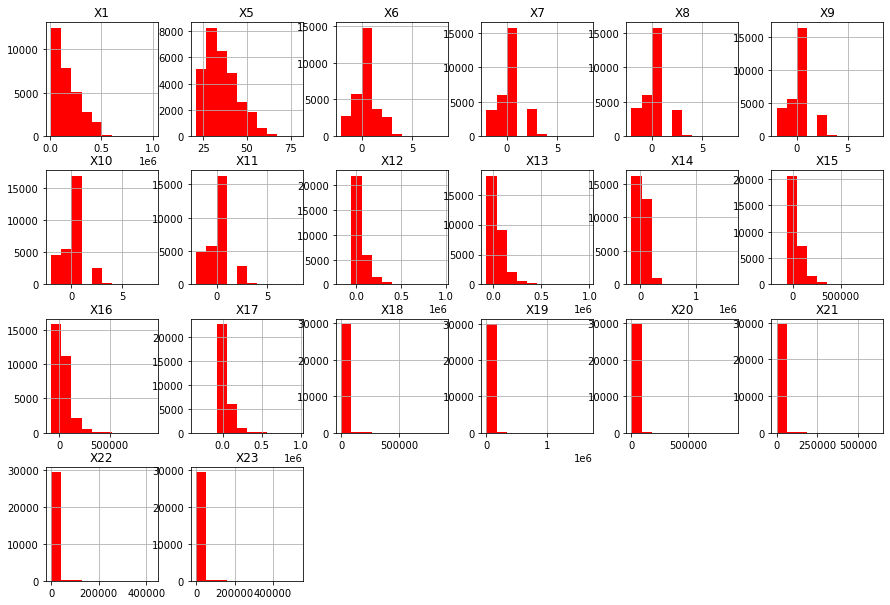

In [15]:
df.hist(layout=(5,6),color="red",figsize=(15,13),grid=True)

**Histogram for Response**

Text(0, 0.5, 'Count')

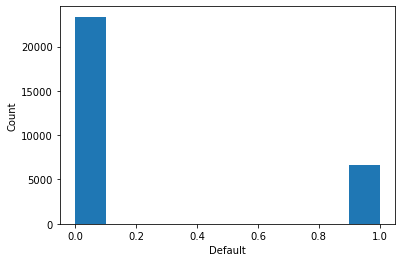

In [16]:
from scipy.stats import norm
plt.hist(df.Y,bins=10)
plt.xlabel('Default')
plt.ylabel('Count')

**Splitting the dataset into test-train**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_resp,test_size=0.3,random_state=10)

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test) 

**Fitting Models**

**Logistic Regression**

In [19]:
Model_LR=LogisticRegression(max_iter=700,C=3)
Model_LR.fit(xtrain,Y_train)
Y_PredLR=Model_LR.predict(xtest)
Model_LR.score(xtest,Y_test)

0.8084444444444444

In [20]:
Model_LR.score(xtrain,Y_train)

0.809952380952381

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_PredLR)
cm

array([[6818,  164],
       [1560,  458]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

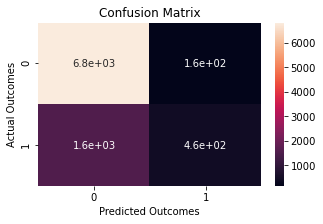

In [22]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

In [23]:
from sklearn.metrics import  classification_report
print(classification_report(Y_test, Y_PredLR))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6982
           1       0.74      0.23      0.35      2018

    accuracy                           0.81      9000
   macro avg       0.78      0.60      0.62      9000
weighted avg       0.80      0.81      0.77      9000



In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score: {}".format(accuracy_score(Y_test,Y_PredLR)))
print("Precision score: {}".format(precision_score(Y_test,Y_PredLR)))
print("Recall score: {}".format(recall_score(Y_test,Y_PredLR)))
print("F1 score: {}".format(f1_score(Y_test,Y_PredLR)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,Y_PredLR))))

Accuracy score: 0.8084444444444444
Precision score: 0.7363344051446945
Recall score: 0.22695738354806738
F1 score: 0.346969696969697
Misclassification score: 0.1915555555555556


**RandomForest Classifier**

In [25]:
model_rf=RandomForestClassifier(n_estimators=500,max_depth=5)
model_rf.fit(xtrain,Y_train)
y_predRF=model_rf.predict(xtest)
model_rf.score(xtest,Y_test)

0.8112222222222222

Text(0.5, 1.0, 'Confusion Matrix')

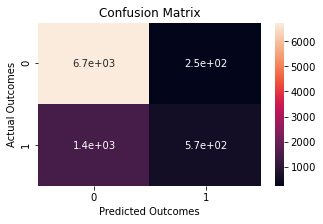

In [26]:
cmRF=confusion_matrix(Y_test,y_predRF)
plt.figure(figsize=(5,3))
sns.heatmap(cmRF,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')
plt.title('Confusion Matrix')

In [27]:
print(classification_report(Y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6982
           1       0.69      0.28      0.40      2018

    accuracy                           0.81      9000
   macro avg       0.76      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000



In [28]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predRF)))
print("Precision score: {}".format(precision_score(Y_test,y_predRF)))
print("Recall score: {}".format(recall_score(Y_test,y_predRF)))
print("F1 score: {}".format(f1_score(Y_test,y_predRF)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predRF))))

Accuracy score: 0.8112222222222222
Precision score: 0.6938031591737546
Recall score: 0.2829534192269574
F1 score: 0.40197113692361847
Misclassification score: 0.18877777777777782


**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(max_depth=3)
model_tree.fit(xtrain,Y_train)
y_predDT=model_tree.predict(xtest)
model_tree.score(xtrain,Y_train)

0.8229047619047619

In [30]:
model_tree.score(xtest,Y_test)

0.8204444444444444

Text(24.0, 0.5, 'Actual Outcomes')

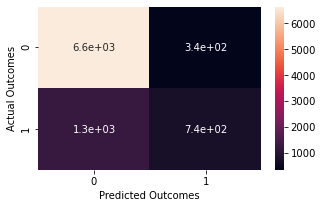

In [31]:
cmDT=confusion_matrix(Y_test,y_predDT)
plt.figure(figsize=(5,3))
sns.heatmap(cmDT,annot=True)
plt.xlabel('Predicted Outcomes')
plt.ylabel('Actual Outcomes')

In [32]:
print(classification_report(Y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.69      0.37      0.48      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [33]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predDT)))
print("Precision score: {}".format(precision_score(Y_test,y_predDT)))
print("Recall score: {}".format(recall_score(Y_test,y_predDT)))
print("F1 score: {}".format(f1_score(Y_test,y_predDT)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predDT))))

Accuracy score: 0.8204444444444444
Precision score: 0.6854243542435424
Recall score: 0.3681863230921705
F1 score: 0.4790457769181174
Misclassification score: 0.17955555555555558


**KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=35)
model_knn.fit(xtrain,Y_train)
y_predknn=model_knn.predict(xtest)
model_knn.score(xtrain,Y_train)

0.818952380952381

In [35]:
model_knn.score(xtest,Y_test)

0.8131111111111111

Text(0, 0.5, 'Error Rate')

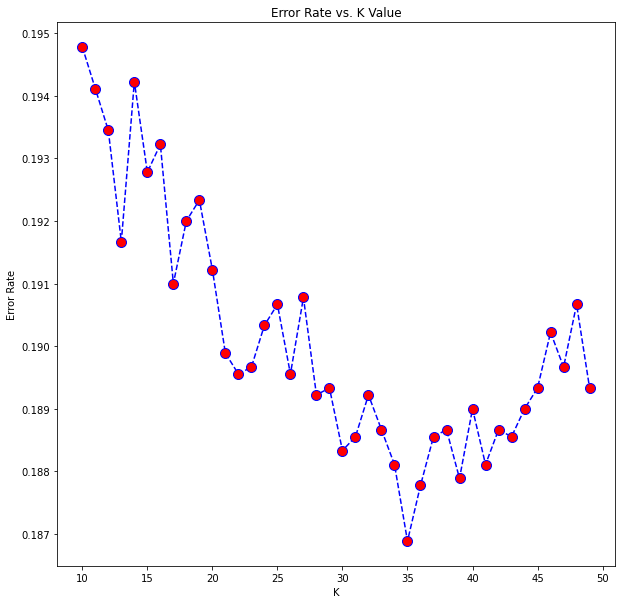

In [36]:
error_rate = []
  
for i in range(10,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(xtrain, Y_train)
    pred_i = knn_classifier.predict(xtest)
    error_rate.append(np.mean(pred_i != Y_test))
  
plt.figure(figsize =(10, 10))
plt.plot(range(10,50), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
print(classification_report(Y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.68      0.32      0.43      2018

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



In [38]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predknn)))
print("Precision score: {}".format(precision_score(Y_test,y_predknn)))
print("Recall score: {}".format(recall_score(Y_test,y_predknn)))
print("F1 score: {}".format(f1_score(Y_test,y_predknn)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predknn))))

Accuracy score: 0.8131111111111111
Precision score: 0.675365344467641
Recall score: 0.32061446977205155
F1 score: 0.4348118279569893
Misclassification score: 0.18688888888888888


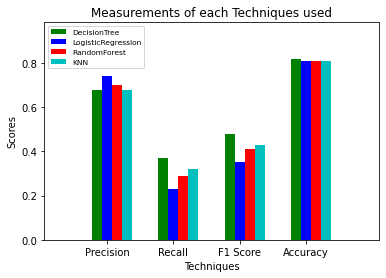

In [39]:
import numpy as np

ind = np.arange(4)
width=0.15

xvals = [0.68,0.37,0.48,0.82]
bar1 = plt.bar( ind,xvals, width=width, color='g')

yvals = [0.74,0.23,0.35,0.81]
bar2 = plt.bar( ind+width,yvals, width=width, color = 'b')

zvals = [0.70,0.29,0.41,0.81]
bar3 = plt.bar( ind+width*2,zvals, width=width, color = 'r')

uvals = [0.68,0.32,0.43,0.81]
bar4 = plt.bar( ind+width*3,uvals, width=width, color = 'c')

plt.xlabel("Techniques")
plt.ylabel('Scores')
plt.title("Measurements of each Techniques used")
plt.xticks(ind+width,['Precision', 'Recall','F1 Score','Accuracy'])
plt.legend((bar1, bar2, bar3, bar4), ('DecisionTree','LogisticRegression', 'RandomForest', 'KNN'), loc = "upper left" ,prop={'size':7.5})
plt.margins(0.2)
plt.show()

**Oversampling and Undersampling Techniques**

In [40]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\archita biswas\anaconda3\lib\site-packages (0.9.0)


**Oversampling using SMOTE**

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 4618
Before OverSampling, counts of label '0': 16382 

After OverSampling, the shape of train_X: (32764, 23)
After OverSampling, the shape of train_y: (32764,) 

After OverSampling, counts of label '1': 16382
After OverSampling, counts of label '0': 16382


In [42]:
sc = StandardScaler()
xtrain_sc = sc.fit_transform(X_train_res) 
xtest_sc = sc.transform(X_test) 

**Fitting models on oversampled dataset**

**Logistic Regression**


In [43]:
Model_LR1=LogisticRegression(C=3)
Model_LR1.fit(xtrain_sc,y_train_res)
Y_PredLR1=Model_LR1.predict(xtest_sc)
Model_LR1.score(xtest_sc,Y_test)

0.6803333333333333

In [44]:
print(classification_report(Y_test, Y_PredLR1))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78      6982
           1       0.36      0.57      0.45      2018

    accuracy                           0.68      9000
   macro avg       0.61      0.64      0.61      9000
weighted avg       0.74      0.68      0.70      9000



In [45]:
print("Accuracy score: {}".format(accuracy_score(Y_test,Y_PredLR1)))
print("Precision score: {}".format(precision_score(Y_test,Y_PredLR1)))
print("Recall score: {}".format(recall_score(Y_test,Y_PredLR1)))
print("F1 score: {}".format(f1_score(Y_test,Y_PredLR1)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,Y_PredLR1))))

Accuracy score: 0.6803333333333333
Precision score: 0.36489462094998426
Recall score: 0.574826560951437
F1 score: 0.4464113911872234
Misclassification score: 0.31966666666666665



**RandomForest Classifier**

In [46]:
model_rf1=RandomForestClassifier(n_estimators=500,max_depth=5)
model_rf1.fit(xtrain_sc,y_train_res)
y_pred1=model_rf1.predict(xtest_sc)
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6982
           1       0.49      0.57      0.53      2018

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.77      0.78      9000



In [47]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_pred1)))
print("Precision score: {}".format(precision_score(Y_test,y_pred1)))
print("Recall score: {}".format(recall_score(Y_test,y_pred1)))
print("F1 score: {}".format(f1_score(Y_test,y_pred1)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_pred1))))

Accuracy score: 0.773
Precision score: 0.4946004319654428
Recall score: 0.5673934588701685
F1 score: 0.5285021924763443
Misclassification score: 0.22699999999999998


**DecisionTree Classifier**

In [48]:
modelDT1=DecisionTreeClassifier(max_depth=5)
modelDT1.fit(xtrain_sc,y_train_res)
y_predDT1=modelDT1.predict(xtest_sc)
print(classification_report(Y_test, y_predDT1))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      6982
           1       0.42      0.57      0.48      2018

    accuracy                           0.73      9000
   macro avg       0.64      0.67      0.65      9000
weighted avg       0.76      0.73      0.74      9000



In [49]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predDT1)))
print("Precision score: {}".format(precision_score(Y_test,y_predDT1)))
print("Recall score: {}".format(recall_score(Y_test,y_predDT1)))
print("F1 score: {}".format(f1_score(Y_test,y_predDT1)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predDT1))))

Accuracy score: 0.7271111111111112
Precision score: 0.4195444526083762
Recall score: 0.5659068384539148
F1 score: 0.48185654008438816
Misclassification score: 0.27288888888888885


**KNN**

In [50]:
model_knn1=KNeighborsClassifier(n_neighbors=10)
model_knn1.fit(xtrain_sc,y_train_res)
y_predknn1=model_knn1.predict(xtest_sc)
model_knn.score(xtrain_sc,y_train_res)

0.5907093151019411

Text(0, 0.5, 'Error Rate')

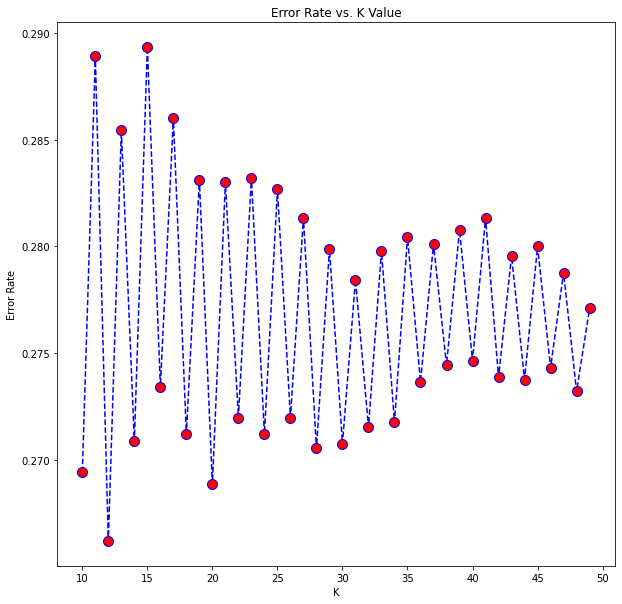

In [51]:
error_rate1 = []
  
for i in range(10,50):
    knn_classifier1 = KNeighborsClassifier(n_neighbors = i)
    knn_classifier1.fit(xtrain_sc,y_train_res)
    pred_i1 = knn_classifier1.predict(xtest_sc)
    error_rate1.append(np.mean(pred_i1 != Y_test))
  
plt.figure(figsize =(10, 10))
plt.plot(range(10,50), error_rate1, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predknn1)))
print("Precision score: {}".format(precision_score(Y_test,y_predknn1)))
print("Recall score: {}".format(recall_score(Y_test,y_predknn1)))
print("F1 score: {}".format(f1_score(Y_test,y_predknn1)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predknn1))))

Accuracy score: 0.7305555555555555
Precision score: 0.4192780642602142
Recall score: 0.5237859266600595
F1 score: 0.46574135272086364
Misclassification score: 0.2694444444444445


**Random Oversampling**

In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)
print('After oversampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After oversampling, the shape of train_y: {} \n'.format(y_resampled.shape))
 
print("After oversampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After oversampling, counts of label '0': {}".format(sum(y_resampled == 0)))

After oversampling, the shape of train_X: (32764, 23)
After oversampling, the shape of train_y: (32764,) 

After oversampling, counts of label '1': 16382
After oversampling, counts of label '0': 16382


In [54]:
sc1 = StandardScaler()
xtrain1 = sc1.fit_transform(X_resampled) 
xtest1 = sc1.transform(X_test) 

**Logistic Regression**

In [55]:
Model_LR2=LogisticRegression(max_iter=700,C=3)
Model_LR2.fit(xtrain1,y_resampled)
Y_PredLR2=Model_LR2.predict(xtest1)
Model_LR2.score(xtest1,Y_test)

0.683

In [56]:
print(classification_report(Y_test, Y_PredLR2))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      6982
           1       0.38      0.64      0.47      2018

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.76      0.68      0.71      9000



In [57]:
print("Accuracy score: {}".format(accuracy_score(Y_test,Y_PredLR2)))
print("Precision score: {}".format(precision_score(Y_test,Y_PredLR2)))
print("Recall score: {}".format(recall_score(Y_test,Y_PredLR2)))
print("F1 score: {}".format(f1_score(Y_test,Y_PredLR2)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,Y_PredLR2))))

Accuracy score: 0.683
Precision score: 0.3771697558105325
Recall score: 0.6352824578790882
F1 score: 0.47332471847886287
Misclassification score: 0.31699999999999995


**Decision Tree**

In [58]:
modelDT2=DecisionTreeClassifier(max_depth=5)
modelDT2.fit(xtrain1,y_resampled)
y_predDT2=modelDT2.predict(xtest1)
print(classification_report(Y_test, y_predDT2))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6982
           1       0.51      0.57      0.54      2018

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.70      9000
weighted avg       0.79      0.78      0.78      9000



In [59]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predDT2)))
print("Precision score: {}".format(precision_score(Y_test,y_predDT2)))
print("Recall score: {}".format(recall_score(Y_test,y_predDT2)))
print("F1 score: {}".format(f1_score(Y_test,y_predDT2)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predDT2))))

Accuracy score: 0.7796666666666666
Precision score: 0.5077399380804953
Recall score: 0.5688800792864221
F1 score: 0.5365739658798785
Misclassification score: 0.22033333333333338


**Random Forest**

In [60]:
model_rf2=RandomForestClassifier(n_estimators=500,max_depth=5)
model_rf2.fit(xtrain1,y_resampled)
y_predrf2=model_rf2.predict(xtest1)
print(classification_report(Y_test, y_predrf2))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6982
           1       0.51      0.60      0.55      2018

    accuracy                           0.78      9000
   macro avg       0.69      0.72      0.70      9000
weighted avg       0.80      0.78      0.79      9000



In [61]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predrf2)))
print("Precision score: {}".format(precision_score(Y_test,y_predrf2)))
print("Recall score: {}".format(recall_score(Y_test,y_predrf2)))
print("F1 score: {}".format(f1_score(Y_test,y_predrf2)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predrf2))))

Accuracy score: 0.7801111111111111
Precision score: 0.5081761006289308
Recall score: 0.6005946481665014
F1 score: 0.5505337270043152
Misclassification score: 0.2198888888888889


**KNN**

In [62]:
model_knn2=KNeighborsClassifier(n_neighbors=80)
model_knn2.fit(xtrain1,y_resampled)
y_predknn2=model_knn2.predict(xtest1)
print(classification_report(Y_test,y_predknn2))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6982
           1       0.47      0.57      0.51      2018

    accuracy                           0.76      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.76      0.77      9000



Text(0, 0.5, 'Error Rate')

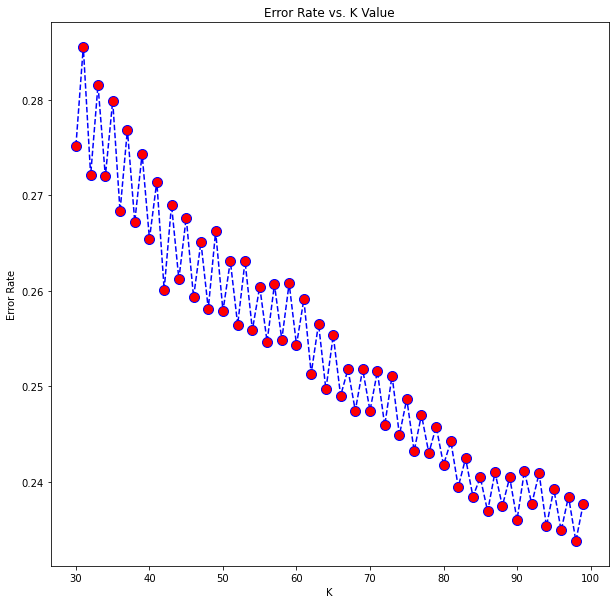

In [63]:
error_rate2 = []
  
for i in range(30,100):
    knn_classifier2 = KNeighborsClassifier(n_neighbors = i)
    knn_classifier2.fit(xtrain1,y_resampled)
    pred_i2 = knn_classifier2.predict(xtest1)
    error_rate2.append(np.mean(pred_i2 != Y_test))
  
plt.figure(figsize =(10, 10))
plt.plot(range(30,100), error_rate2, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predknn2)))
print("Precision score: {}".format(precision_score(Y_test,y_predknn2)))
print("Recall score: {}".format(recall_score(Y_test,y_predknn2)))
print("F1 score: {}".format(f1_score(Y_test,y_predknn2)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predknn2))))

Accuracy score: 0.7582222222222222
Precision score: 0.4678861788617886
Recall score: 0.570366699702676
F1 score: 0.5140687807056721
Misclassification score: 0.24177777777777776


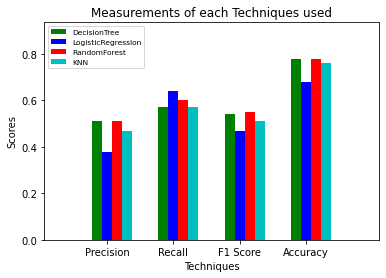

In [65]:
ind = np.arange(4)
width=0.15

xvals = [0.51,0.57,0.54,0.78]
bar1 = plt.bar( ind,xvals, width=width, color='g')

yvals = [0.38,0.64,0.47,0.68]
bar2 = plt.bar( ind+width,yvals, width=width, color = 'b')

zvals = [0.51,0.60,0.55,0.78]
bar3 = plt.bar( ind+width*2,zvals, width=width, color = 'r')

uvals = [0.47,0.57,0.51,0.76]
bar4 = plt.bar( ind+width*3,uvals, width=width, color = 'c')

plt.xlabel("Techniques")
plt.ylabel('Scores')
plt.title("Measurements of each Techniques used")
plt.xticks(ind+width,['Precision', 'Recall','F1 Score','Accuracy'])
plt.legend((bar1, bar2, bar3, bar4), ('DecisionTree','LogisticRegression', 'RandomForest', 'KNN'), loc = "upper left" ,prop={'size':7.5})
plt.margins(0.2)
plt.show()

**Undersampling**

In [66]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, Y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (9236, 23)
After Undersampling, the shape of train_y: (9236,) 

After Undersampling, counts of label '1': 4618
After Undersampling, counts of label '0': 4618


**Fitting models on undersampled dataset**

**RandomForest Classifier**

In [67]:
model_rf2=RandomForestClassifier(n_estimators=300,max_depth=5)
model_rf2.fit(X_train_miss,y_train_miss.ravel())
y_pred2=model_rf2.predict(xtest)
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.71      0.33      0.45      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



C:\Users\Archita Biswas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**DecisionTree Classifier**

In [68]:
modelDT3=DecisionTreeClassifier(max_depth=4,random_state=3)
modelDT3.fit(X_train_miss,y_train_miss.ravel())
y_predDT3=modelDT3.predict(xtest)
print(classification_report(Y_test, y_predDT3))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6982
           1       0.59      0.45      0.51      2018

    accuracy                           0.81      9000
   macro avg       0.72      0.68      0.70      9000
weighted avg       0.79      0.81      0.80      9000



C:\Users\Archita Biswas\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Checking for multicollinearity**

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["features"]=X.columns
vif

,VIF,features
0,4.037479,X1
1,9.092210,X2
2,6.731119,X3
3,6.265388,X4
4,10.857679,X5
5,1.918276,X6
6,3.211217,X7
7,3.727427,X8
8,4.440120,X9
9,4.985856,X10


**Deleting covariates for which VIF>10 and then fitting model**

In [70]:
X_new=X.drop(["X5","X12","X13","X14","X15","X16","X17"],axis=1)
X_new.head()

,X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,90000,2,2,2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679


In [71]:
X_train_n,X_test_n,Y_train_n,Y_test_n=train_test_split(X_new,Y_resp,test_size=0.3,random_state=10)

In [72]:
sc_x1 = StandardScaler()
xtrain2 = sc_x1.fit_transform(X_train_n) 
xtest2 = sc_x1.transform(X_test_n) 

**RandomForest Classifier**

In [73]:
model_rf_new=RandomForestClassifier(n_estimators=500,max_depth=5)
model_rf_new.fit(xtrain2,Y_train_n)
y_pred_new=model_rf_new.predict(xtest2)
print(classification_report(Y_test_n, y_pred_new))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6982
           1       0.70      0.35      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [74]:
print("Accuracy score: {}".format(accuracy_score(Y_test_n,y_pred_new)))
print("Precision score: {}".format(precision_score(Y_test_n,y_pred_new)))
print("Recall score: {}".format(recall_score(Y_test_n,y_pred_new)))
print("F1 score: {}".format(f1_score(Y_test_n,y_pred_new)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test_n,y_pred_new))))

Accuracy score: 0.8202222222222222
Precision score: 0.6956947162426614
Recall score: 0.35232903865213083
F1 score: 0.4677631578947369
Misclassification score: 0.17977777777777781


**DecisionTree classifier**

In [75]:
modelDT4=DecisionTreeClassifier(max_depth=5)
modelDT4.fit(xtrain2,Y_train_n)
y_predDT4=modelDT4.predict(xtest2)
print(classification_report(Y_test_n, y_predDT4))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.69      0.36      0.47      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [76]:
print("Accuracy score: {}".format(accuracy_score(Y_test_n,y_predDT4)))
print("Precision score: {}".format(precision_score(Y_test_n,y_predDT4)))
print("Recall score: {}".format(recall_score(Y_test_n,y_predDT4)))
print("F1 score: {}".format(f1_score(Y_test_n,y_predDT4)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test_n,y_predDT4))))

Accuracy score: 0.8195555555555556
Precision score: 0.6894230769230769
Recall score: 0.3553022794846383
F1 score: 0.46893394375408765
Misclassification score: 0.1804444444444444


**KNN**

In [77]:
model_knn3=KNeighborsClassifier(n_neighbors=31)
model_knn3.fit(xtrain2,Y_train_n)
y_predknn3=model_knn3.predict(xtest2)
print(classification_report(Y_test_n,y_predknn3))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6982
           1       0.66      0.35      0.46      2018

    accuracy                           0.81      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



Text(0, 0.5, 'Error Rate')

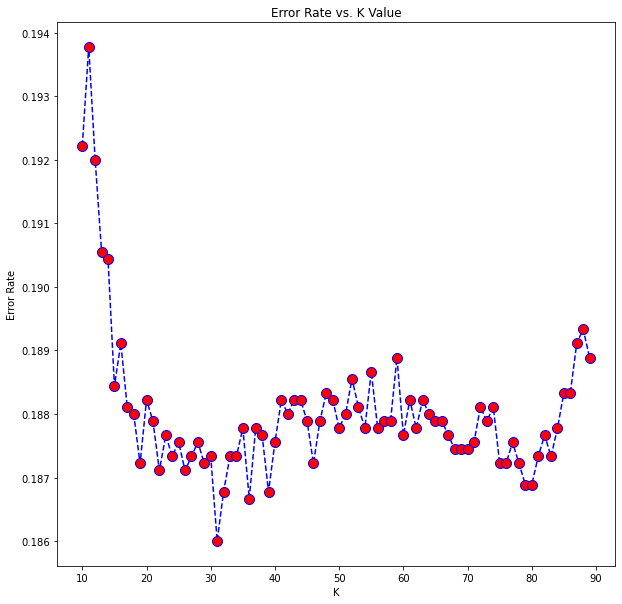

In [78]:
error_rate3= []
  
for i in range(10,90):
    knn_classifier3 = KNeighborsClassifier(n_neighbors = i)
    knn_classifier3.fit(xtrain2,Y_train_n)
    pred_i3 = knn_classifier3.predict(xtest2)
    error_rate3.append(np.mean(pred_i3 != Y_test_n))
  
plt.figure(figsize =(10, 10))
plt.plot(range(10,90), error_rate3, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [79]:
print("Accuracy score: {}".format(accuracy_score(Y_test_n,y_predknn3)))
print("Precision score: {}".format(precision_score(Y_test_n,y_predknn3)))
print("Recall score: {}".format(recall_score(Y_test_n,y_predknn3)))
print("F1 score: {}".format(f1_score(Y_test_n,y_predknn3)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test_n,y_predknn3))))

Accuracy score: 0.814
Precision score: 0.6610486891385767
Recall score: 0.34985133795837464
F1 score: 0.457550226830849
Misclassification score: 0.18600000000000005


**Using boosting techniques on Oversampled data**

**AdaBoost**

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [81]:
model_adaboost= AdaBoostClassifier(n_estimators=50,base_estimator=model_rf2,learning_rate=1,random_state=10)
model_adaboost.fit(X_resampled,y_resampled)
y_predADA = model_adaboost.predict(X_test)
model_adaboost.score(X_test,Y_test)

0.776

In [82]:
print(classification_report(Y_test,y_predADA))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6982
           1       0.50      0.57      0.53      2018

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000



In [83]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predADA)))
print("Precision score: {}".format(precision_score(Y_test,y_predADA)))
print("Recall score: {}".format(recall_score(Y_test,y_predADA)))
print("F1 score: {}".format(f1_score(Y_test,y_predADA)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predADA))))

Accuracy score: 0.776
Precision score: 0.5004325259515571
Recall score: 0.5733399405351833
F1 score: 0.5344110854503464
Misclassification score: 0.22399999999999998


**XG Boost**

In [84]:
X_resampled.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,200000,2,3,2,29,-1,-1,-1,-1,0,...,12555,882,882,0,7485,12625,882,0,0,0
1,20000,1,2,2,23,1,2,0,0,0,...,19447,19312,17987,17822,1500,1500,1000,1000,1000,1000
2,180000,1,2,2,43,-1,-1,-2,-2,-2,...,2378,10396,2527,2173,5739,2385,10427,2534,2179,13903
3,180000,2,2,1,39,-1,-1,0,-1,0,...,11867,8111,6312,3739,11662,6003,8111,273,3739,6547
4,290000,2,2,2,29,-2,-1,-1,-1,-1,...,0,302,390,1278,1591,0,302,390,1278,0


In [85]:
X_resampled.dtypes

X1        int64
X2     category
X3     category
X4     category
X5        int64
X6        int64
X7        int64
X8        int64
X9        int64
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
dtype: object

In [86]:
X_encoded=pd.get_dummies(X_resampled,columns=['X2','X3','X4'],drop_first=True)
X_encoded.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,200000,29,-1,-1,-1,-1,0,0,5555,7485,...,1,0,0,1,0,0,0,0,1,0
1,20000,23,1,2,0,0,0,0,17682,18595,...,0,0,1,0,0,0,0,0,1,0
2,180000,43,-1,-1,-2,-2,-2,-2,5904,5715,...,0,0,1,0,0,0,0,0,1,0
3,180000,39,-1,-1,0,-1,0,0,2569,11662,...,1,0,1,0,0,0,0,1,0,0
4,290000,29,-2,-1,-1,-1,-1,-1,0,1591,...,1,0,1,0,0,0,0,0,1,0


In [87]:
Xtest_encoded=pd.get_dummies(X_test,columns=['X2','X3','X4'],drop_first=True)
Xtest_encoded.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
20412,160000,26,-1,-1,-1,-1,-1,0,5417,15134,...,0,1,0,0,0,0,0,0,1,0
1296,50000,29,1,2,2,2,0,0,37170,36297,...,0,0,1,0,0,0,0,0,1,0
3906,380000,33,0,0,0,0,0,0,112926,108573,...,1,1,0,0,0,0,0,1,0,0
20454,400000,26,0,0,0,0,0,0,98580,67946,...,0,1,0,0,0,0,0,0,1,0
5200,60000,34,0,0,0,0,0,0,55447,48270,...,1,1,0,0,0,0,0,0,1,0


In [88]:
X_encoded.dtypes

X1      int64
X5      int64
X6      int64
X7      int64
X8      int64
X9      int64
X10     int64
X11     int64
X12     int64
X13     int64
X14     int64
X15     int64
X16     int64
X17     int64
X18     int64
X19     int64
X20     int64
X21     int64
X22     int64
X23     int64
X2_2    uint8
X3_1    uint8
X3_2    uint8
X3_3    uint8
X3_4    uint8
X3_5    uint8
X3_6    uint8
X4_1    uint8
X4_2    uint8
X4_3    uint8
dtype: object

In [89]:
import xgboost as xgb
model_xg = xgb.XGBClassifier(learning_rate = 0.5,gamma=10, n_estimators = 30)

In [90]:
model_xg.fit(X_encoded,y_resampled)
y_predxg = model_xg.predict(Xtest_encoded)

C:\Users\Archita Biswas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:23:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
print(classification_report(Y_test,y_predxg))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      6982
           1       0.47      0.62      0.54      2018

    accuracy                           0.76      9000
   macro avg       0.67      0.71      0.69      9000
weighted avg       0.79      0.76      0.77      9000



In [92]:
print("Accuracy score: {}".format(accuracy_score(Y_test,y_predxg)))
print("Precision score: {}".format(precision_score(Y_test,y_predxg)))
print("Recall score: {}".format(recall_score(Y_test,y_predxg)))
print("F1 score: {}".format(f1_score(Y_test,y_predxg)))
print("Misclassification score: {}".format((1-accuracy_score(Y_test,y_predxg))))

Accuracy score: 0.7572222222222222
Precision score: 0.46894756415024175
Recall score: 0.6248761149653121
F1 score: 0.5357977480348416
Misclassification score: 0.24277777777777776


In [94]:
xgb1 = xgb.XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': [10,30,50],
              'gamma': [10,20,30,40,50],
               'learning_rate': [0.1,0.3,0.5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb1, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_encoded, y_resampled)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

C:\Users\Archita Biswas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best result: 0.6994872510345868 for {'gamma': 10, 'learning_rate': 0.5, 'n_estimators': 30}
